## Import libraries

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, accuracy_score

import joblib


# Modeling

### Train 6 ML algorithm:
* Gaussian Naive Bayes 
* Logistic Regression
* Decision Tree
* Random Forest
* Gradient Boosting
* XGBoost


### 1) Load data

In [3]:

Train = pd.read_csv('input/Train.csv', index_col='id')
Val = pd.read_csv('input/Val.csv', index_col='id')
Test = pd.read_csv('input/Test.csv', index_col='id')

df00_not_norm = pd.read_csv('input/df_not_norm.csv', index_col='id')

Train.head()

,loan_amnt,term,emp_length,annual_inc,addr_state,dti,mths_since_recent_inq,bc_open_to_buy,num_op_rev_tl,home_ownership_MORTGAGE,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,target
id,,,,,,,,,,,,,,
105253408,0.179897,-0.564595,0.289061,0.119112,0.231563,0.410550,2.617142,-0.612313,-1.188055,1,0,0,0,1
16592425,0.546808,1.771181,0.000214,-0.183949,-0.964507,0.069240,-1.046230,0.647751,1.963171,0,0,1,0,0
58470345,-0.966701,-0.564595,0.289061,-0.637249,0.967607,-1.046003,-0.679893,-0.678597,-1.188055,0,0,0,1,0
10092824,-0.508062,-0.564595,0.289061,1.013113,-0.596485,-0.662140,0.785456,7.479804,5.789659,1,0,0,0,0
65965690,0.753196,-0.564595,1.127005,0.930595,-2.068572,0.227040,-0.130387,0.558573,-0.287704,1,0,0,0,1


### 2) Split X and y

In [4]:
X_train = Train.drop(['target'], axis=1)
y_train = Train['target']


X_val = Val.drop(['target'], axis=1)
y_val = Val['target']


X_test = Test.drop(['target'], axis=1)
y_test = Test['target']

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape



((807186, 13), (807186,), (269062, 13), (269062,), (269062, 13), (269062,))

In [5]:
X_train.head()

,loan_amnt,term,emp_length,annual_inc,addr_state,dti,mths_since_recent_inq,bc_open_to_buy,num_op_rev_tl,home_ownership_MORTGAGE,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT
id,,,,,,,,,,,,,
105253408,0.179897,-0.564595,0.289061,0.119112,0.231563,0.410550,2.617142,-0.612313,-1.188055,1,0,0,0
16592425,0.546808,1.771181,0.000214,-0.183949,-0.964507,0.069240,-1.046230,0.647751,1.963171,0,0,1,0
58470345,-0.966701,-0.564595,0.289061,-0.637249,0.967607,-1.046003,-0.679893,-0.678597,-1.188055,0,0,0,1
10092824,-0.508062,-0.564595,0.289061,1.013113,-0.596485,-0.662140,0.785456,7.479804,5.789659,1,0,0,0
65965690,0.753196,-0.564595,1.127005,0.930595,-2.068572,0.227040,-0.130387,0.558573,-0.287704,1,0,0,0


### Model 1) Gaussian Naive Bayes
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html


In [6]:
# 1) Gaussian Naive Bayes


gaussian = GaussianNB()
gaussian.fit(X_train, y_train)


GaussianNB()

### Model 2) Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [7]:
# 2) Logistic Regression

logreg = LogisticRegression(penalty='l2', 
                            dual=False, 
                            tol=0.0001, 
                            C=1, 
                            fit_intercept=True, 
                            intercept_scaling=1, 
                            class_weight=None, 
                            random_state=None, 
                            solver='liblinear', 
                            max_iter=100, 
                            multi_class='ovr', 
                            verbose=0, 
                            warm_start=False, 
                            n_jobs=1)
logreg.fit(X_train, y_train)



LogisticRegression(C=1, multi_class='ovr', n_jobs=1, solver='liblinear')

### Model 3) Decision Tree
https://scikit-learn.org/stable/modules/tree.html

In [8]:
#Decision Tree

dectree = DecisionTreeClassifier(criterion='gini', 
                                 splitter='best', 
                                 max_depth=4, 
                                 min_samples_split=2, 
                                 min_samples_leaf=2, 
                                 min_weight_fraction_leaf=0.0,
                                 max_features=None, 
                                 random_state=None, 
                                 max_leaf_nodes=None, 
                                 min_impurity_decrease=0.0, 
                                 class_weight=None)
dectree.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

### Model 4) Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [9]:
# Random Forest

rndforest = RandomForestClassifier(n_estimators=10, 
                                   criterion='gini', 
                                   max_depth=3, 
                                   min_samples_split=2, 
                                   min_samples_leaf=1, 
                                   min_weight_fraction_leaf=0.0, 
                                   max_features='sqrt', 
                                   max_leaf_nodes=None, 
                                   min_impurity_decrease=0.0, 
                                   bootstrap=True, 
                                   oob_score=False, 
                                   n_jobs=None, 
                                   random_state=None, 
                                   verbose=0, 
                                   warm_start=False, 
                                   class_weight=None)
rndforest.fit(X_train, y_train)



RandomForestClassifier(max_depth=3, n_estimators=10)

### Model 5) Gradient Boosting Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [10]:
# Gradient Boosting Classifier

gbc = GradientBoostingClassifier(loss='log_loss', 
                                 learning_rate=0.1,
                                 n_estimators=100, 
                                 subsample=1.0, 
                                 criterion='friedman_mse',
                                 min_samples_split=2, 
                                 min_samples_leaf=1,
                                 min_weight_fraction_leaf=0.0,
                                 max_depth=3,
                                 min_impurity_decrease=0.0, 
                                #  min_impurity_split=None, 
                                 init=None, 
                                 random_state=None,
                                 max_features=None,
                                 verbose=0, 
                                 max_leaf_nodes=None, 
                                 warm_start=False, 
                                #  presort='auto',
                                 validation_fraction=0.2, 
                                 n_iter_no_change=None,
                                 tol=0.0001)

gbc.fit(X_train, y_train)


GradientBoostingClassifier(validation_fraction=0.2)

### Model 6) XGBoost


In [11]:


xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',  # for binary classification tasks
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    min_child_weight=1,           # similar to min_samples_leaf
    max_depth=3,
    gamma=0.0,                    # similar to min_impurity_decrease
    random_state=None,
    colsample_bytree=1.0,         # similar to max_features
    verbosity=1,                  # similar to verbose (1 for messages, 0 for silent)
    early_stopping_rounds=10,     # similar to n_iter_no_change
    nthread=-1,                   # to use all available threads
    booster='gbtree'              # use gradient boosted trees as default
)

xgb_classifier.fit(
    X_train, y_train, 
    eval_set=[(X_train, y_train)], 
    eval_metric='logloss',        # for binary classification
    verbose=True,                 # print messages during training
    early_stopping_rounds=10      # stop if performance doesn't improve after 10 rounds
)



[12:08:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-logloss:0.65482
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.62589
[2]	validation_0-logloss:0.60046
[3]	validation_0-logloss:0.58008
[4]	validation_0-logloss:0.56268
[5]	validation_0-logloss:0.54870
[6]	validation_0-logloss:0.53691
[7]	validation_0-logloss:0.52658
[8]	validation_0-logloss:0.51841
[9]	validation_0-logloss:0.51159
[10]	validation_0-logloss:0.50500
[11]	validation_0-logloss:0.50040
[12]	validation_0-logloss:0.49541
[13]	validation_0-logloss:0.49231
[14]	validation_0-logloss:0.48920
[15]	validation_0-logloss:0.48646
[16]	validation_0-logloss:0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=10, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='exact', validate_parameters=1,
              verbosity=1)

## Model Evaluation

#### ROC curve

In [12]:

def plot_roc_curves(X, y, models, model_names, info, figsize=(12,8)):
    """
    Plots ROC curves for a list of models.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): input features for the models
    y (numpy.ndarray or pandas.DataFrame): target variable
    models (list): list of models to compare
    model_names (list): list of model names to display on the plot
    info (string): info about validation or test dataset. 'validation' or 'test'
    figsize (tuple): size of the figure to display the plot

    Returns:
    None
    """
    fig, ax = plt.subplots(figsize=figsize)
    models_ = []
    roc_auc_ = []
    # Loop over models and plot ROC curve
    for i, model in enumerate(models):
        y_pred = list(model.predict_proba(X)[:, 1])
        fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label=(model_names[i] + ' AUC = %0.4f' % roc_auc), linewidth=2.0)
        models_.append(model_names[i])
        roc_auc_.append(roc_auc) 
    

    ax.grid(False)
    ax.tick_params(length=6, width=2, labelsize=15, grid_color='r', grid_alpha=0.5)
    leg = plt.legend(loc='lower right', prop={'size': 15})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', fontsize=20)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.xlabel('False Positive Rate', fontsize=15)
#     plt.show()
    return (
    pd.DataFrame(data={
        'Models':models_,
        'AUC_'+info:roc_auc_,
    })
    )

,Models,AUC_validation
0,Gaussian Naive Bayes,0.659087
1,Logistic Regression,0.670631
2,Decision Tree,0.651922
3,RandomForest,0.657396
4,Gradient Boosting,0.685897
5,XGBoost,0.685422


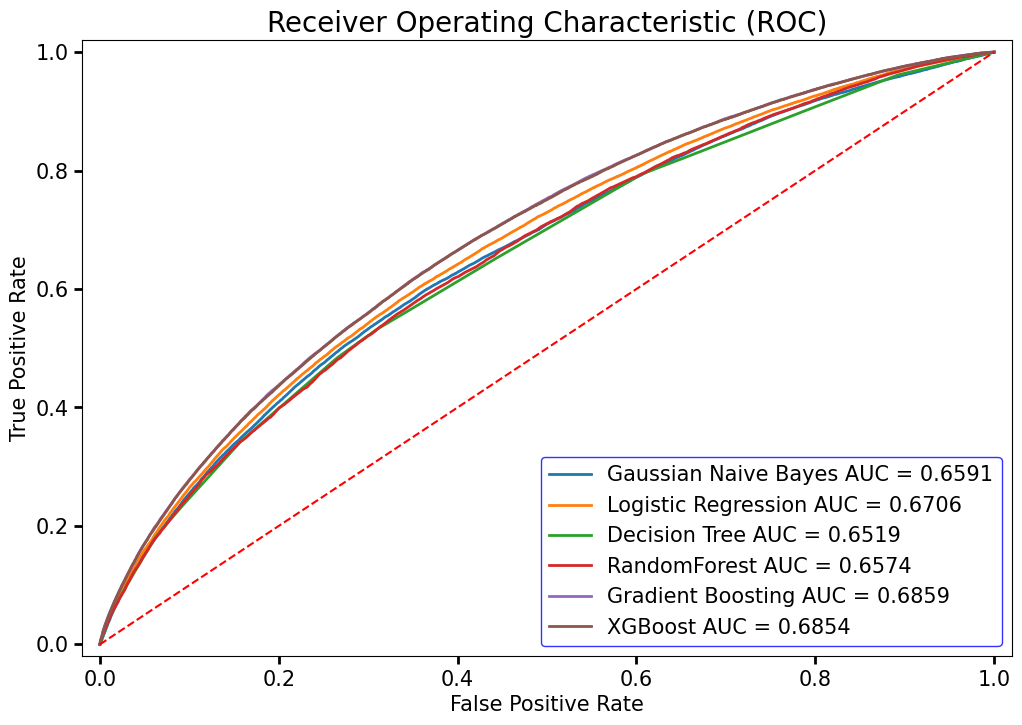

In [13]:
# Define the list of models to compare
models = [gaussian, logreg, dectree, rndforest, gbc, xgb_classifier]
model_names = ['Gaussian Naive Bayes','Logistic Regression', 'Decision Tree', 'RandomForest', 'Gradient Boosting', 'XGBoost']
# Plot ROC curves for in-sample data
val_roc_auc = plot_roc_curves(X_val, y_val, models, model_names, info='validation')
val_roc_auc

,Models,AUC_test
0,Gaussian Naive Bayes,0.659490
1,Logistic Regression,0.671052
2,Decision Tree,0.651497
3,RandomForest,0.656972
4,Gradient Boosting,0.685603
5,XGBoost,0.685138


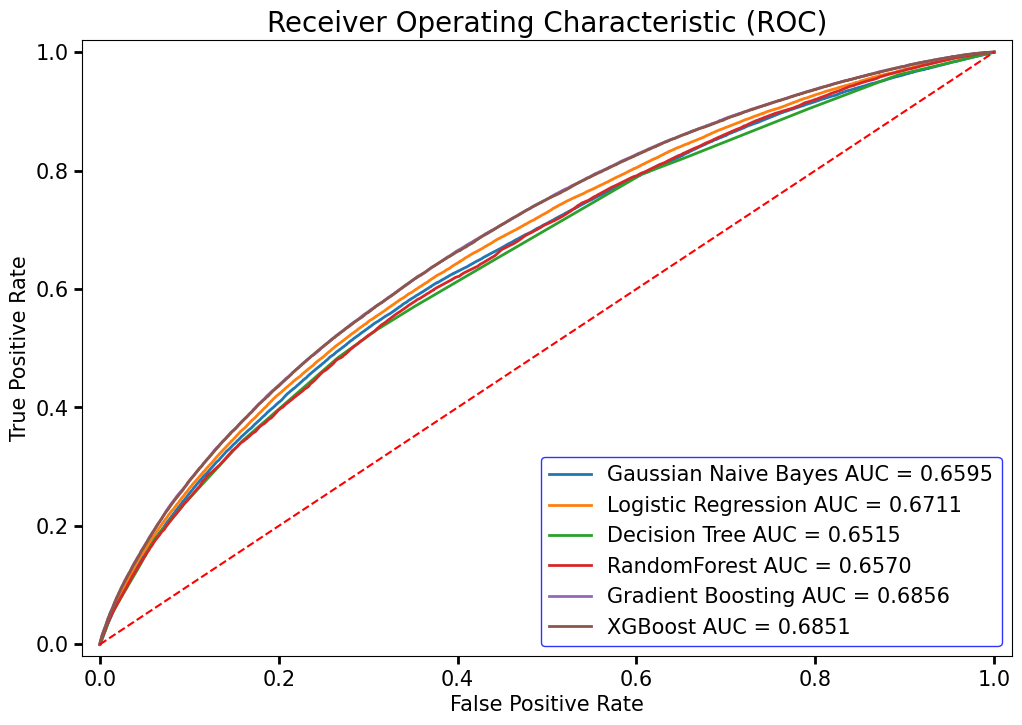

In [14]:
# Plot ROC curves for out-of-sample data
test_roc_auc = plot_roc_curves(X_test, y_test, models, model_names, info='test')
test_roc_auc

## Best ROC AUC Model

In [16]:
pd.merge(val_roc_auc,test_roc_auc,how='left',on='Models').sort_values(by='AUC_test',ascending=False)

,Models,AUC_validation,AUC_test
4,Gradient Boosting,0.685897,0.685603
5,XGBoost,0.685422,0.685138
1,Logistic Regression,0.670631,0.671052
0,Gaussian Naive Bayes,0.659087,0.659490
3,RandomForest,0.657396,0.656972
2,Decision Tree,0.651922,0.651497


### Optimal threshold

In [17]:
# Define a function to find the best threshold for a given model
def find_best_threshold(model, num_steps):
    highest_f1 = 0
    best_threshold = 0
    best_acc = 0
    best_rec = 0
    best_pre = 0
    # Iterate over a range of thresholds
    for threshold in np.linspace(0, 1, num_steps):
        # Predict the target variable using the given threshold
        y_predict = (model.predict_proba(X_val)[:, 1] >= threshold)
        # Calculate various evaluation metrics
        f1 = f1_score(y_val, y_predict)
        acc = accuracy_score(y_val, y_predict)
        rec = recall_score(y_val, y_predict)
        pre = precision_score(y_val, y_predict)
        # Update the best threshold and metrics if F1 score improves
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre = \
                threshold, f1, acc, rec, pre
    # Return the best threshold and evaluation metrics
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [18]:


# Create an empty list to store the results
chart = list()

# Iterate over the models and find the best threshold for each one
for item, name in zip(models, model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(item, 20)
    # Append the results to the chart list
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])

# Create a pandas dataframe from the chart list and display it
chart = pd.DataFrame(chart, columns=['Model', 'Best Threshold', 'F1 Score', 'Accuracy', 'Recall', 'Precision'])
# chart.to_csv('model_evaluation_scores.csv')
chart

,Model,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Gaussian Naive Bayes,0.210526,0.388477,0.602199,0.632950,0.280237
1,Logistic Regression,0.210526,0.395862,0.664044,0.551367,0.308776
2,Decision Tree,0.210526,0.379801,0.684809,0.483449,0.312750
3,RandomForest,0.210526,0.382504,0.661257,0.525562,0.300664
4,Gradient Boosting,0.210526,0.405440,0.670641,0.562537,0.316932
5,XGBoost,0.210526,0.405479,0.668155,0.566875,0.315618


### Confusion Matrix

In [19]:
def make_confusion_matrix_val(model, threshold=0.5):
    """
    Create a confusion matrix plot for the given model and threshold. 
    
    Parameters:
    -----------
    model : sklearn classifier
        The classification model to evaluate.
    threshold : float, default=0.5
        Probability threshold for binary classification.
        
    Returns:
    --------
    None
    
    """
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_val)[:, 1] >= threshold)
    
    # calculate the confusion matrix
    buyer_confusion = confusion_matrix(y_val, y_predict)
    
    # plot the confusion matrix as heatmap
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(buyer_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Buyer', 'Buyer'],
           yticklabels=['Not Buyer', 'Buyer']);
    
    # calculate TP, FP, FN, and TN values from the confusion matrix
    TP = buyer_confusion[0][0]
    FP = buyer_confusion[0][1]
    FN = buyer_confusion[1][0]
    TN = buyer_confusion[1][1]

    tot = TP+FP+FN+TN
    print(FN/(tot),TN/(tot), FN/(tot) + TN/(tot))
    
    # rotate y-axis ticks
    plt.yticks(rotation = 0)
    
    # set plot title, x and y labels
    plt.title('Predicted vs. Actual',
            # fontname = '.SF Compact Display',
            fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

In [20]:
def make_confusion_matrix_test(model, info='num', threshold=0.5):
    """
    Generates a confusion matrix for a given model on the test dataset, given a threshold.

    Args:
    - model: a trained machine learning model
    - info: plot num or perc in confusion matrix
    - threshold: threshold for binary classification

    Returns: None
    """

    # Predict class 1 if probability of being in class 1 is greater than threshold
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)

    # Generate confusion matrix
    buyer_confusion = confusion_matrix(y_test, y_predict)

    # Plot heatmap of confusion matrix
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    if info=='num':
        sns.heatmap(buyer_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
                    xticklabels=['Not Buyer', 'Buyer'],
                    yticklabels=['Not Buyer', 'Buyer'])
    else:
        sns.heatmap(buyer_confusion/np.sum(buyer_confusion), cmap=plt.cm.Blues, annot=True, 
                    square=True, 
                    fmt='.3%',
                    xticklabels=['Not Buyer', 'Buyer'],
                    yticklabels=['Not Buyer', 'Buyer'])

    # Calculate TP, FP, FN, TN
    TP = buyer_confusion[0][0]
    FP = buyer_confusion[0][1]
    FN = buyer_confusion[1][0]
    TN = buyer_confusion[1][1]
    
    tot = TP+FP+FN+TN
    print(round(100*FN/(tot),2),round(100*TN/(tot),2), round(100*(FN/(tot) + TN/(tot)),2))
    
    # Add title, labels and rotate y-tick labels
    plt.yticks(rotation=0)
    plt.title('Predicted vs. Actual', 
    fontsize=20, pad=10)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

### Confusion Matrix for Random Forest 

0.09471051281860686 0.10491633898506664 0.1996268518036735


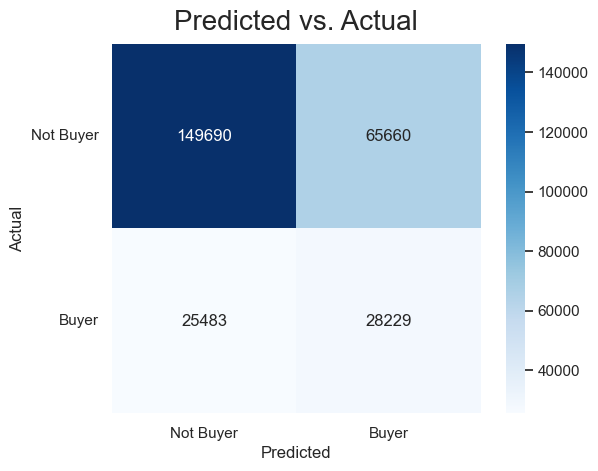

In [21]:
# Create a confusion matrix for the Random Forest model with a threshold of 0.474 on the validation data
make_confusion_matrix_val(rndforest, threshold=0.210526)

# Save the plot as PNG file
# plt.savefig('confusion_matrix_val_random_forest.png');

9.44 10.52 19.96


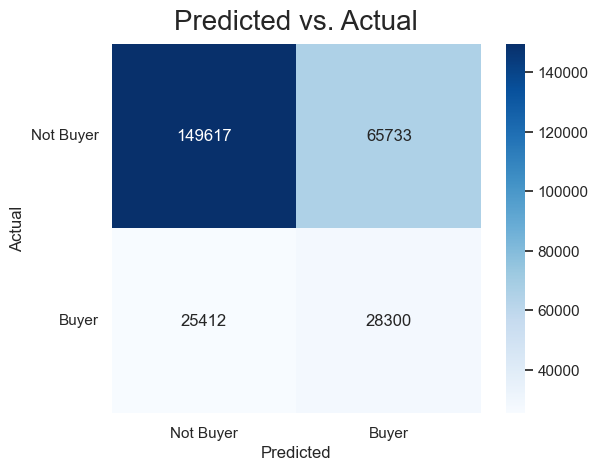

In [22]:
# Generate confusion matrix for random forest model on test dataset
make_confusion_matrix_test(rndforest, threshold=0.210526)

9.44 10.52 19.96


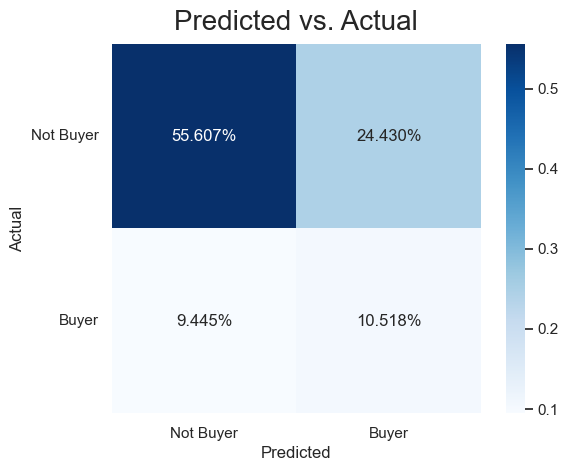

In [23]:
# Generate confusion matrix for random forest model on test dataset
make_confusion_matrix_test(rndforest, info='perc', threshold=0.210526)

### Confusion Matrix for XGBoost 

0.08646334302131108 0.11316350878236243 0.1996268518036735


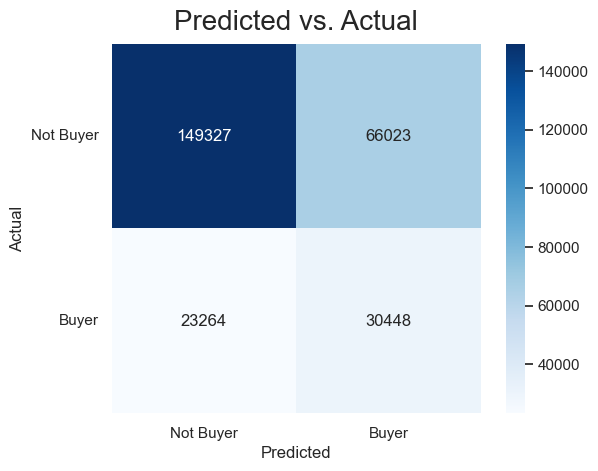

In [24]:
# Create a confusion matrix 
make_confusion_matrix_val(xgb_classifier, threshold=0.210526)

8.61 11.35 19.96


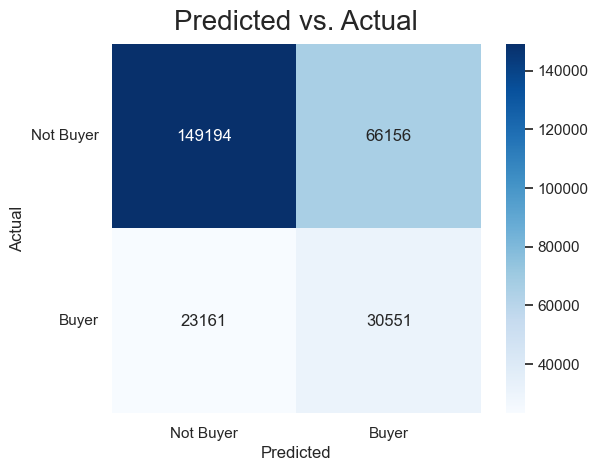

In [25]:
make_confusion_matrix_test(xgb_classifier, threshold=0.210526)

8.61 11.35 19.96


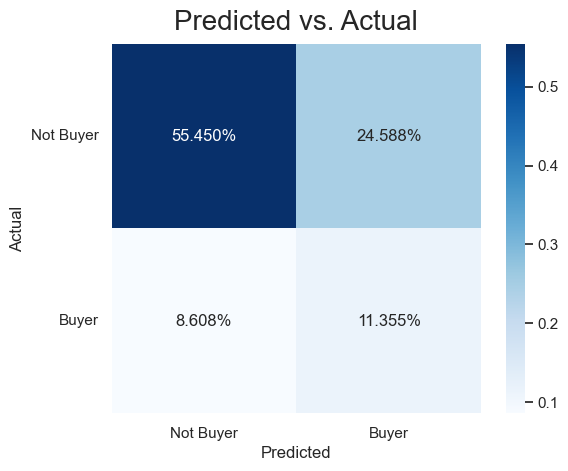

In [26]:
make_confusion_matrix_test(xgb_classifier,info='perc', threshold=0.210526)

### Confusion Matrix for Gradient Boosting

0.08732931443310464 0.11229753737056887 0.1996268518036735


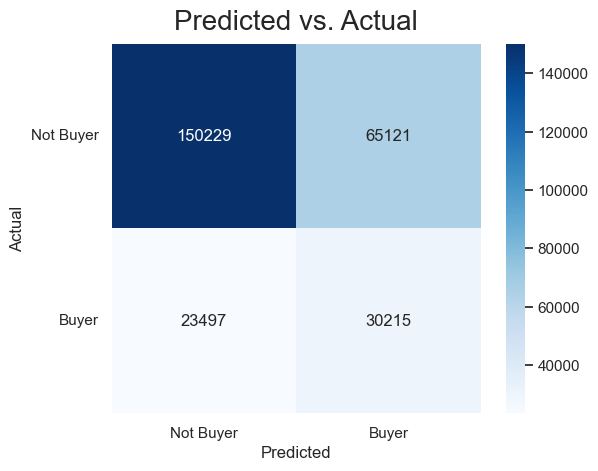

In [27]:
# Create a confusion matrix 
make_confusion_matrix_val(gbc, threshold=0.210526)

8.69 11.27 19.96


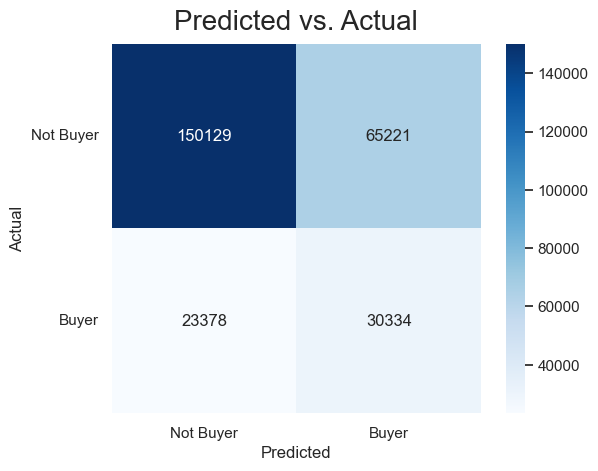

In [28]:
# Generate confusion matrix 
make_confusion_matrix_test(gbc, threshold=0.210526)


8.69 11.27 19.96


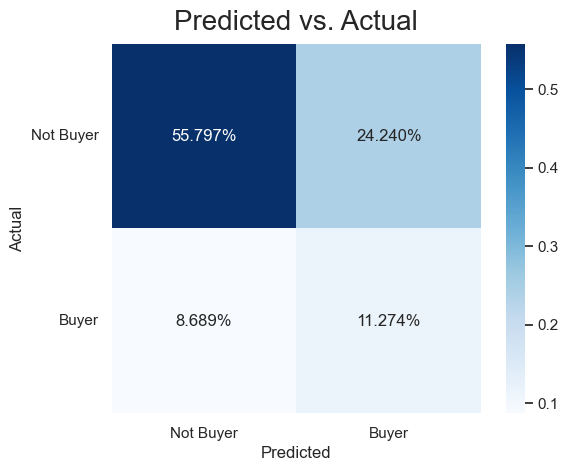

In [29]:
# Generate confusion matrix 
make_confusion_matrix_test(gbc, info='perc',threshold=0.210526)


8.92 11.05 19.96


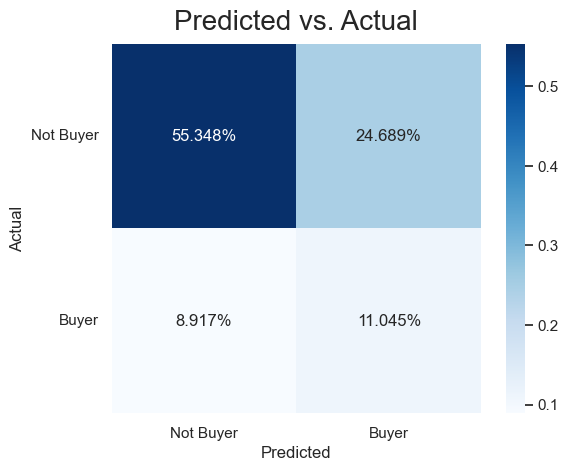

In [30]:
# Generate confusion matrix 
make_confusion_matrix_test(logreg, info='perc',threshold=0.210526)


## Choose the Best Model

In [49]:
import sklearn

print(sklearn.__version__)


1.3.0


In [66]:
# best_model = xgb_classifier ## problems with shap so I choose gbc. After I fix the problem I return to xgboost
best_model = gbc

In [67]:
import joblib
print(joblib.__version__)
models_names_short = ['gaussian', 'logreg', 'dectree', 'rndforest', 'gbc', 'xgb_classifier']
for i, model in enumerate(models):
    if model == best_model:
        # save best model;
        joblib.dump(model, "artifacts/best_model.joblib") 

    else:
        joblib.dump(model, "artifacts/" + models_names_short[i] + "_model.joblib") 

features_used_to_train = X_train.columns.tolist()
joblib.dump(features_used_to_train, "artifacts/features_used_to_train.joblib") 


1.3.2


['artifacts/features_used_to_train.joblib']

In [68]:
import sys
print(sys.version)


3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]


## Adding results to Train, Val and Test dataframe

In [69]:
# Train
Train['y_pred'] = best_model.predict(X_train)
Train['y_score'] = best_model.predict_proba(X_train)[:,1]

# Validation
Val['y_pred'] = best_model.predict(X_val)
Val['y_score'] = best_model.predict_proba(X_val)[:,1]

# Test
Test['y_pred'] = best_model.predict(X_test)
Test['y_score'] = best_model.predict_proba(X_test)[:,1]


## Saving Train, Val and Test datraframe with results.

In [70]:
Train.to_csv('input/Train_after_modeling.csv', sep=',', encoding='utf-8',index=True)
Val.to_csv('input/Val_after_modeling.csv', sep=',', encoding='utf-8',index=True)
Test.to_csv('input/Test_after_modeling.csv', sep=',', encoding='utf-8',index=True)

## Explain ML Model

#### Feature Importance

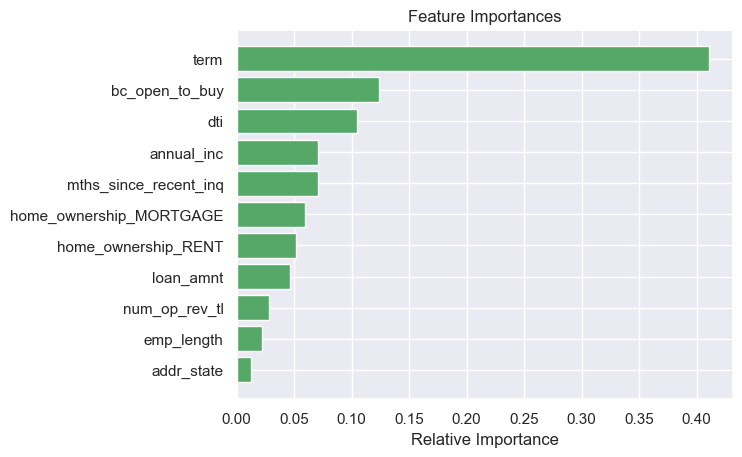

In [71]:
importances = best_model.feature_importances_
indices = np.argsort(importances)
features = X_train.columns.tolist()
plt.title('Feature Importances')
j = 11 # top j importance
plt.barh(range(j), importances[indices][len(indices)-j:], color='g', align='center')
#plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(j), [features[i] for i in indices[len(indices)-j:]])
plt.xlabel('Relative Importance')
plt.show()

### Shap Importance

In [72]:
import shap

In [73]:
# compute SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)

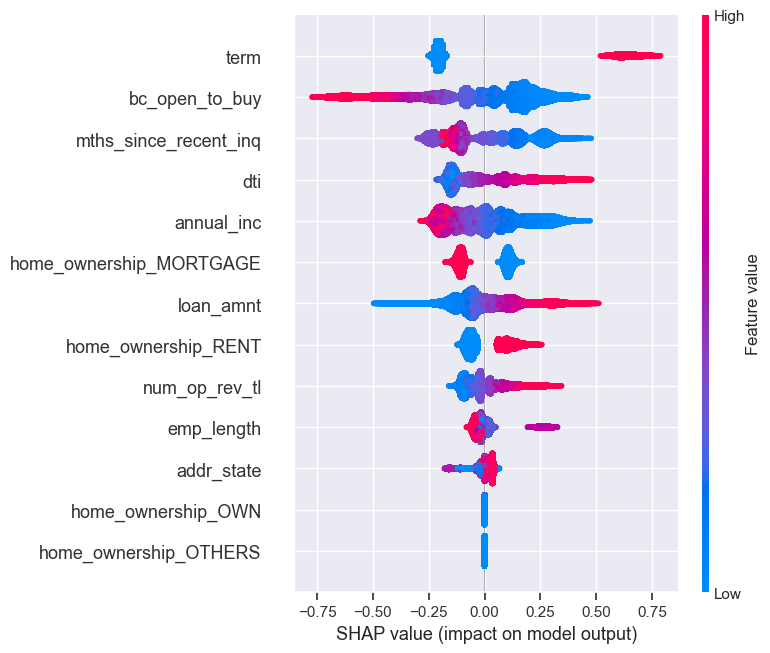

In [74]:
shap.summary_plot(shap_values, X_train.values, feature_names = X_train.columns)

In [75]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((807186, 13), (807186,), (269062, 13), (269062,), (269062, 13), (269062,))

In [76]:
# compute SHAP values
explainer_t = shap.TreeExplainer(best_model)
shap_values_t = explainer.shap_values(X_test)

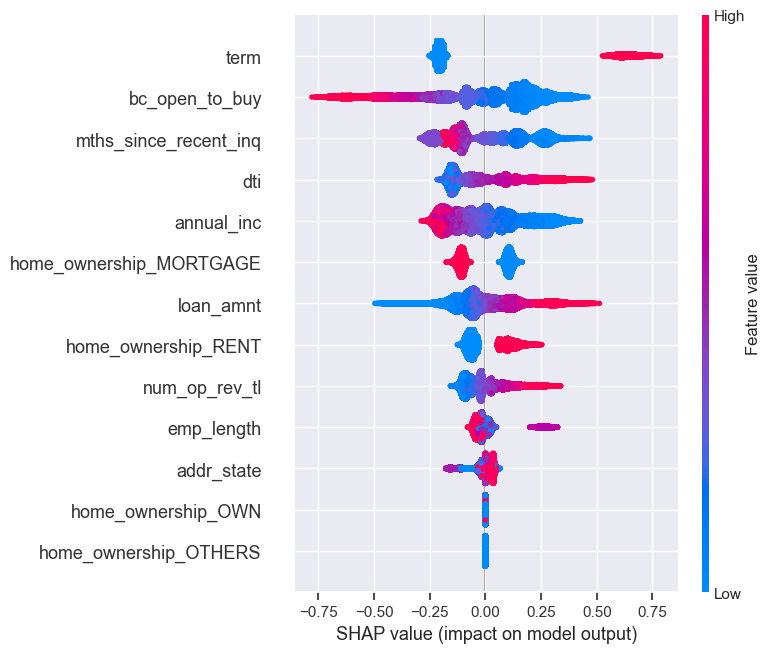

In [77]:
shap.summary_plot(shap_values_t, X_test.values, feature_names = X_test.columns)

### Selecting features
- loan_amnt - The listed amount of the loan applied by the borrower.
- term - The number of payments on the loan, where values are in months and can be either 36 or 60.
- int_rate - The interest rate on the loan
- sub_grade - Assigned loan subgrade score based on borrower's credit history
- emp_length - Borrow's employment length in years.
- home_ownership - The homeownership status provided by the borrower (eg rent, own, mortgage, etc)
- annual_inc - The self-reported annual income provided by the borrower
- addr_state - The state provided by the borrower in the loan application
- dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage, divided by the borrower’s monthly income.
- mths_since_recent_inq - Months since most recent inquiry
- revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- bc_open_to_buy - Total open to buy on revolving bankcards
- bc_util - Ratio of total current balance to high credit/credit limit for all bankcard accounts
- num_op_rev_tl - Number of open revolving accounts
- loan_status - Current status of the loan (eg fully paid or charged off), this is the label we are going to predict with the model.

### Explain Features and yours values.
- loan with 60 months have higher probability to have Charge Off status in future.
- For lower values on bc_open_to_buy, mths_since_recent_inq and annual_inc have more probability of Charge Off status in future.
- For higher values on dti, loan_amount and num_op_rev_tl there are higher probability of Charge Off status in future.
- There are higher probability of Charge Off status for Borrowers dont have Mortage or have Rent status.  


In [79]:
## stop here!!

## Problems SHAP and XGBoost
### Trying to fix

In [ ]:
print(shap.__version__)
print(xgb.__version__)

0.42.0
1.1.0


In [ ]:
print(shap.__version__)
print(xgb.__version__)
shap.initjs()

X,y = shap.datasets.boston()
model = xgb.train({"learning_rate": 0.01}, xgb.DMatrix(X, label=y), 100)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X.as_matrix())

shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

0.42.0
1.1.0


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:

explainer = shap.TreeExplainer(xgb_classifier)
# shap_values = explainer.shap_values(np.array(X_train))
shap_values = explainer.shap_values(X_train.values)

TypeError: Booster.predict() got an unexpected keyword argument 'iteration_range'

In [ ]:
print(best_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=10, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='exact', validate_parameters=1,
              verbosity=1)


In [ ]:
print(gbc)

GradientBoostingClassifier(validation_fraction=0.2)
